# Datasets
- Dataset: Data + Labels
- DataLoader: Iterable around Dataset

In [26]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

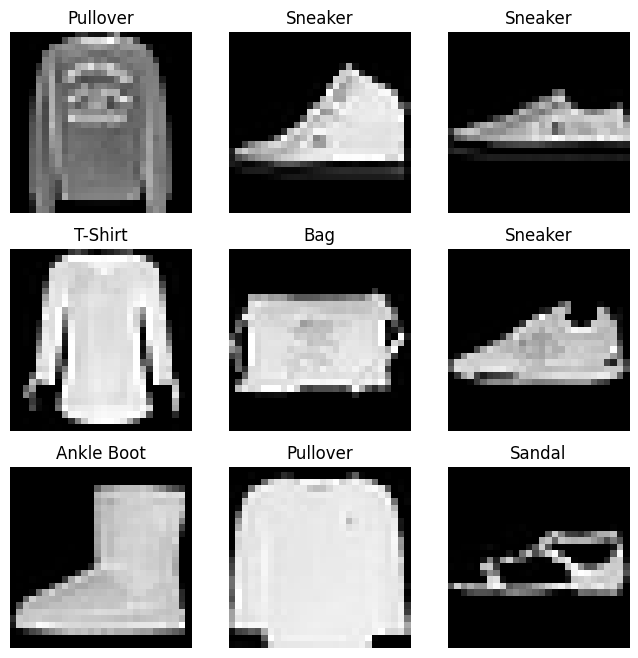

In [27]:
import torch
from matplotlib import pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

train_features.shape=torch.Size([64, 1, 28, 28])
train_labels.shape=torch.Size([64])


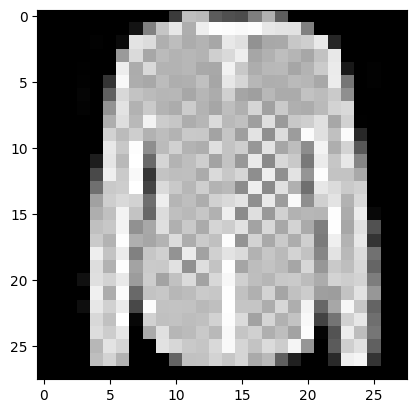

label=tensor(6) Shirt


In [28]:
train_features, train_labels = next(iter(train_dataloader))
print(f"{train_features.shape=}")
print(f"{train_labels.shape=}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"{label=} {labels_map[label.item()]}")

- transform: Transforms features (Here transform to tensor)
- target_transform: Transforms label (Here create 1d tensor with length 10 for each possible value)

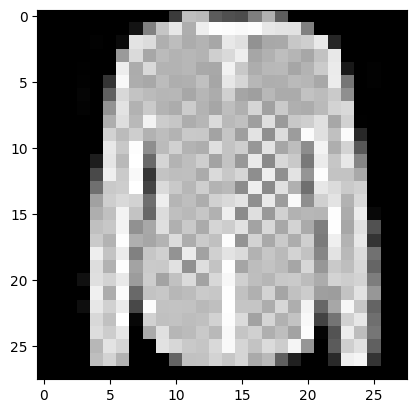

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [29]:
from torchvision.transforms import Lambda
batch_size = 64
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

any_x, any_y = next(iter(train_data))
img = train_features[0].squeeze()

plt.imshow(img, cmap="gray")
plt.show()

print(any_x)
print(any_y)

- torch.autograd
    - Differentiation engine: Automatic computation of gradient for any computational graph

In [30]:
import torch
import torch.nn as nn

x = torch.randn(32, 3, 224, 224)  # (batch_size, channels, height, width)

flatten = nn.Flatten(start_dim=1)
flat_output = flatten(x)

print(f"Original shape: {x.shape}")
print(f"Flattened output shape: {flat_output.shape}")

Original shape: torch.Size([32, 3, 224, 224])
Flattened output shape: torch.Size([32, 150528])


In [31]:
from torch import nn


class NeuralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()  # Flatten tensor starting from second dimensions e.g. Batch_Size, Channels, Height, Width --> N, C * H * W
        self.net = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.net(x)
        return logits


model = NeuralNetwork()

In [32]:


def train_loop(dataloader: DataLoader, model: nn.Module, loss_function, optimizer):
    size = len(dataloader.dataset)
    # Set model to training mode (relevant for batch norm & dropout)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_function(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            print(f"loss: {loss.item():>7f}  [{batch * batch_size + len(X):>5d}/{size:>5d}]")


def test_loop(dataloader: DataLoader, model: nn.Module, loss_function):
    # Set model to eval mode (relevant for batch norm & dropout)
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [33]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_function, optimizer)
    test_loop(test_dataloader, model, loss_function)

Epoch 1
-------------------------------
loss: 2.303161  [   64/60000]
loss: 2.289824  [ 6464/60000]
loss: 2.266260  [12864/60000]
loss: 2.261326  [19264/60000]
loss: 2.267899  [25664/60000]
loss: 2.236863  [32064/60000]
loss: 2.220918  [38464/60000]
loss: 2.191646  [44864/60000]
loss: 2.168614  [51264/60000]
loss: 2.162714  [57664/60000]
Test Error: 
 Accuracy: 38.4%, Avg loss: 2.157945 

Epoch 2
-------------------------------
loss: 2.152547  [   64/60000]
loss: 2.126270  [ 6464/60000]
loss: 2.134579  [12864/60000]
loss: 2.100931  [19264/60000]
loss: 2.070860  [25664/60000]
loss: 2.014392  [32064/60000]
loss: 1.982160  [38464/60000]
loss: 1.950115  [44864/60000]
loss: 1.962489  [51264/60000]
loss: 1.959693  [57664/60000]
Test Error: 
 Accuracy: 55.7%, Avg loss: 1.885238 

Epoch 3
-------------------------------
loss: 1.901591  [   64/60000]
loss: 1.813121  [ 6464/60000]
loss: 1.775095  [12864/60000]
loss: 1.814104  [19264/60000]
loss: 1.806492  [25664/60000]
loss: 1.722670  [32064/600